# Workshop #4: Descriptive Statistics & Intro to Probability

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
import seaborn as sns
import scipy.stats as stats
import random

## Problem 1
Michael is throwing darts at a target. He is very good at the game, so the chances of him hitting the “bullseye” (i.e. the center) are 25%. It is reasonable to assume that individual **attempts are independent**. If he throws 5 times in total, what is the probability that he will hit the bullseye:
* Exactly three times
* at least 3 times

Note: the exact numbers are:
* `P(exactly three bullseyes) = 0.08789`
* `P(at least three bullseyes) = 0.1035`

In [ ]:
# We run a simulation

n = 5000 #number of simulations
throws = 5 #number of throws per simulation
bullseye_probability = 0.25

exactly_three = 0
at_least_three = 0

for i in range(n):
    hits = 0
    for j in range(throws):
        if random.random() < bullseye_probability:
            hits += 1

    if hits == 3:
        exactly_three += 1

    if hits >= 3:
        at_least_three += 1

P_exactly_three = exactly_three / n
P_at_least_three = at_least_three / n

print(f"P(exactly three bullseyes): {P_exactly_three:.5f}")
print(f"P(at least three bullseyes): {P_at_least_three:.5f}")

P(exactly three bullseyes): 0.09160
P(at least three bullseyes): 0.10480


## Problem 2
Only two international airlines fly daily into an airport. UN Air has 70 flights a day and IS Air has 65 flights a day. Passengers flying with UN Air have an 18% probability of losing their luggage and passengers flying with IS Air have a 23% probability of losing their luggage. You overhear someone in the airport complain about her luggage being lost. Find the probability that she travelled with IS Air.

Note: the exact probability is `0.543`

In [ ]:
# We run a simulation
n = 5000 # number of simulations

#probability of flying with UN Air
un_air_probability = 70 / (70 + 65)

#probability of flying with IS Air
is_air_probability = 65 / (70 + 65)

#probability of losing luggage with UN Air
un_air_luggage_loss_probability = 0.18

#probability of losing luggage with IS Air
is_air_luggage_loss_probability = 0.23

is_air_given_lost_luggage = 0
total_lost_luggage = 0

for i in range(n):
    if random.random() < is_air_probability:
        airline = "IS Air"
        luggage_lost = random.random() < is_air_luggage_loss_probability
    else:
        airline = "UN Air"
        luggage_lost = random.random() < un_air_luggage_loss_probability

    #if luggage is lost, check if it was with IS Air
    if luggage_lost:
        total_lost_luggage += 1
        if airline == "IS Air":
            is_air_given_lost_luggage += 1

P_is_air_given_lost_luggage = is_air_given_lost_luggage / total_lost_luggage

print(f"Probability that passenger travelled with IS Air: {P_is_air_given_lost_luggage:.5f}")

Probability that passenger travelled with IS Air: 0.55871


## Problem 3

The five most common words appearing in spam emails are shipping!, today!, here!, available, and fingertips! (Andy Greenberg, “The Most Common Words In Spam Email,” Forbes website, March 17, 2010). Many spam filters separate spam from ham (email not considered to be spam) through application of Bayes’ theorem. Suppose that for one email account, 1 in every 10 messages is spam and the proportions of spam messages that have the five most common words in spam email are given below.

| Word        	| Probability 	|
|-------------	|-------------	|
| shipping!   	| 0.051       	|
| today!      	| 0.045       	|
| here!       	| 0.034       	|
| available   	| 0.014       	|
| fingertips! 	| 0.014       	|


Also suppose that the proportions of ham messages that have these words are:

| Word        	| Probability 	|
|-------------	|-------------	|
| shipping!   	| 0.0015      	|
| today!      	| 0.0022      	|
| here!       	| 0.0022      	|
| available   	| 0.0041      	|
| fingertips! 	| 0.0011      	|

a) If a message includes the word shipping!, what is the probability the message is spam? If a message includes the word shipping!, what is the probability the message is ham? Should messages that include the word shipping! be flagged as spam?

b) If a message includes the word today!, what is the probability the message is spam? If a message includes the word here!, what is the probability the message is spam? Which of these two words is a stronger indicator that a message is spam? Why?

c) If a message includes the word available, what is the probability the message is spam? If a message includes the word fingertips!, what is the probability the message is spam? Which of these two words is a stronger indicator that a message is spam? Why?

d) What insights do the results of parts b) and c) yield about what enables a spam filter that uses Bayes’ theorem to work effectively?

In [4]:
# Run simulations
n = 100000 # number of simulations

prob_spam = 0.1
prob_ham = 0.9

#probabilities in spam
prob_shipping_spam = 0.051
prob_today_spam = 0.045
prob_here_spam = 0.034
prob_available_spam = 0.014
prob_fingertips_spam = 0.014

#probabilities in ham
prob_shipping_ham = 0.0015
prob_today_ham = 0.0022
prob_here_ham = 0.0022
prob_available_ham = 0.0041
prob_fingertips_ham = 0.0011

shipping_spam_given_word = 0
shipping_ham_given_word = 0

today_spam_given_word = 0
today_ham_given_word = 0

here_spam_given_word = 0
here_ham_given_word = 0

available_spam_given_word = 0
available_ham_given_word = 0

fingertips_spam_given_word = 0
fingertips_ham_given_word = 0

for _ in range(n):
    is_spam = random.random() < prob_spam
    is_ham = not is_spam

    # shipping
    word_in_message = random.random() < (prob_shipping_spam if is_spam else prob_shipping_ham)
    if word_in_message:
        if is_spam:
            shipping_spam_given_word += 1
        else:
            shipping_ham_given_word += 1

    # today
    word_in_message = random.random() < (prob_today_spam if is_spam else prob_today_ham)
    if word_in_message:
        if is_spam:
            today_spam_given_word += 1
        else:
            today_ham_given_word += 1

    # here
    word_in_message = random.random() < (prob_here_spam if is_spam else prob_here_ham)
    if word_in_message:
        if is_spam:
            here_spam_given_word += 1
        else:
            here_ham_given_word += 1

    # available
    word_in_message = random.random() < (prob_available_spam if is_spam else prob_available_ham)
    if word_in_message:
        if is_spam:
            available_spam_given_word += 1
        else:
            available_ham_given_word += 1

    # fingertips
    word_in_message = random.random() < (prob_fingertips_spam if is_spam else prob_fingertips_ham)
    if word_in_message:
        if is_spam:
            fingertips_spam_given_word += 1
        else:
            fingertips_ham_given_word += 1

P_shipping_spam_given_word = shipping_spam_given_word / (shipping_spam_given_word + shipping_ham_given_word)
P_shipping_ham_given_word = shipping_ham_given_word / (shipping_spam_given_word + shipping_ham_given_word)

P_today_spam_given_word = today_spam_given_word / (today_spam_given_word + today_ham_given_word)
P_here_spam_given_word = here_spam_given_word / (here_spam_given_word + here_ham_given_word)
P_available_spam_given_word = available_spam_given_word / (available_spam_given_word + available_ham_given_word)
P_fingertips_spam_given_word = fingertips_spam_given_word / (fingertips_spam_given_word + fingertips_ham_given_word)

# Прикажи резултати
print(f"P(Spam | 'shipping'):    {P_shipping_spam_given_word:.5f}")
print(f"P(Ham  | 'shipping'):    {P_shipping_ham_given_word:.5f}")
print(f"P(Spam | 'today'):       {P_today_spam_given_word:.5f}")
print(f"P(Spam | 'here'):        {P_here_spam_given_word:.5f}")
print(f"P(Spam | 'available'):   {P_available_spam_given_word:.5f}")
print(f"P(Spam | 'fingertips'):  {P_fingertips_spam_given_word:.5f}")

P(Spam | 'shipping'):    0.78295
P(Ham  | 'shipping'):    0.21705
P(Spam | 'today'):       0.69183
P(Spam | 'here'):        0.63315
P(Spam | 'available'):   0.26096
P(Spam | 'fingertips'):  0.63839


## Problem 4
The file `major_salary.csv` contains data about monthly salaries and majors for some emplyees.
* Consider all the salary data. Construct a histogram and a box plot to visualize the distribution of the salaries. Then calculate the Five-Number-Summary of the salaries for all employees and the skewness coefficient.
* Using the **z-score**, identify and list any outliers in the set of all salaries.
* Now consider the data about the salaries *categorized by major*. Visualize the salaries for each major by box-plots in one graph (**use seaborn exactly as the one we did on Monday for the fuel data**). Comment the results.

In [ ]:
# Loading the data
df = pd.read_csv('major_salary.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   major   111 non-null    object
 1   salary  111 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


,major,salary
0,Management,3330
1,Management,2700
2,Finance,3155
3,Accounting,3855
4,Info Systems,4220


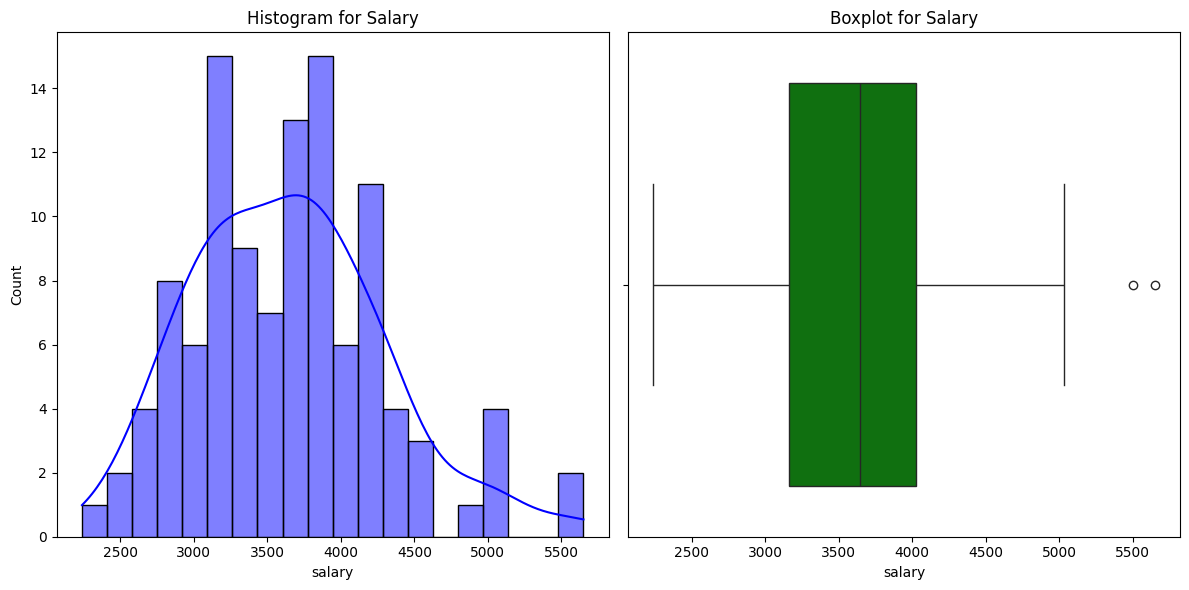

Range = 3410
Variance = 424846.99426699436
St. deviation = 651.8028799161556

Five Number Summary for Salary
min = 2240
Q1 = 3165.0
median = 3645.0
Q3 = 4025.0
max = 5650

Skewness of the salary distribution: 0.5396853870144327


In [ ]:
# Constructing histogram and box-plot of the salaries
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['salary'], kde=True, color='blue', bins=20)
plt.title('Histogram for Salary')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['salary'], color='green')
plt.title('Boxplot for Salary')

plt.tight_layout()
plt.show()

# Calculating the five-number summary
salary =  df['salary']

range_salary = salary.max() - salary.min()
var_salary = salary.var()
st_dev_salary = salary.std()

print("Range =", range_salary)
print("Variance =", var_salary)
print("St. deviation =", st_dev_salary)

Q1_salary = np.percentile(salary, 25)
Q3_salary = np.percentile(salary, 75)
IQR_salary = Q3_salary - Q1_salary
min_salary = salary.min()
median_salary = salary.median()
max_salary = salary.max()

print()
print("Five Number Summary for Salary");
print("min =", min_salary)
print("Q1 =", Q1_salary)
print("median =", median_salary)
print("Q3 =", Q3_salary)
print("max =", max_salary)

skew_salary = stats.skew(salary)
print()
print(f"Skewness of the salary distribution: {skew_salary}")

In [ ]:
# Listing outliers with the z-score
z_scores = stats.zscore(df['salary'])
outliers = df[abs(z_scores) > 3]
print("Outliers based on Z-score:")
print(outliers)

Outliers based on Z-score:
         major  salary
83  Accounting    5650


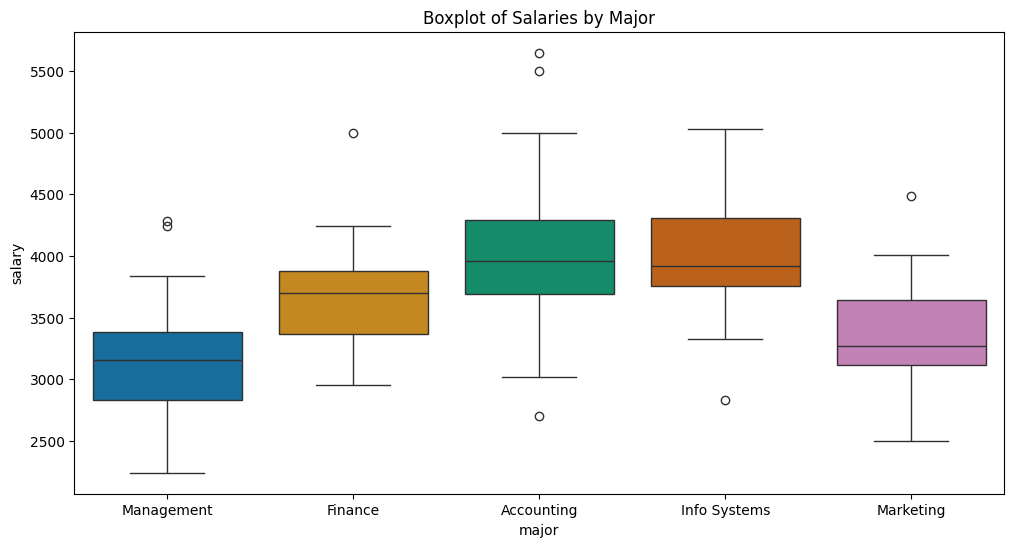

In [ ]:
# Visualizing the salaries per major
plt.figure(figsize=(12, 6))
sns.boxplot(x='major', y='salary', data=df, hue='major', palette='colorblind')
plt.title('Boxplot of Salaries by Major')
plt.show()

## Problem 5

Let $M_h$ and $F_h$ be the events "the student's mother works in healthcare" and "student's father works in healthcare", respectively. Find the conditional probabilities:
* $P(M_h \mid F_h)$
* $P(F_h \mid M_h)$

Use `student-mat.csv`

In [ ]:
# Loading the data set
df = pd.read_csv('student-mat.csv')
df.head()

Mh = df['Mjob'] == 'health'
Fh = df['Fjob'] == 'health'

#the father works in healthcare
P_Fh = Fh.mean()

#the mother works in healthcare
P_Mh = Mh.mean()

#both parents work in healthcare
P_Mh_and_Fh = ((Mh) & (Fh)).mean()

# Using the formula: P(M_h | F_h) = P(M_h and F_h)/P(F_h)
P_Mh_given_Fh = P_Mh_and_Fh / P_Fh

# Using the formula: P(F_h | M_h) = P(F_h and M_h)/P(M_h)
P_Fh_given_Mh = P_Mh_and_Fh / P_Mh

print(f"P(M_h | F_h) = {P_Mh_given_Fh}")
print(f"P(F_h | M_h) = {P_Fh_given_Mh}")

P(M_h | F_h) = 0.3333333333333333
P(F_h | M_h) = 0.1764705882352941


## Problem 6 and 7

Choose one from the file `Workshop #4 - Bonus.pdf`



###Problem 7

In a certain town three newspapers are published. 20% of the population read A, 16% read B, 14% read C,
8% read A and B, 5% read A and C, 4% read B and C, and 2% read all three newspapers. A person is selected
at random. Use a Venn diagram to help determine the probability that the person reads:
- a) none of the papers
- b) at least one of the papers
- c) exactly one of the papers
- d) A or B (or both)
- e) A, given that the person reads at least one paper
- f) C, given that the person reads either A or B (or both)

a) Probability that the person reads none of the papers: 0.65
b) Probability that the person reads at least one paper: 0.35
c) Probability that the person reads exactly one paper: 0.22
d) Probability that the person reads A or B (or both): 0.23
e) Probability that the person reads A, given that they read at least one paper: 0.5714
f) Probability that the person reads C, given that they read A or B (or both): 0.3043



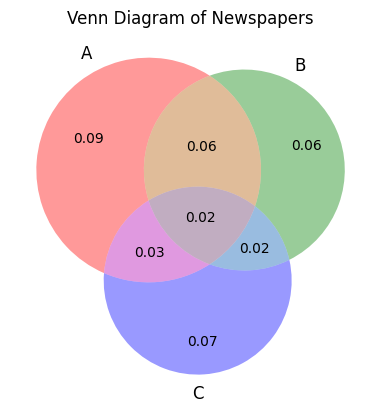

In [ ]:
P_A = 0.20
P_B = 0.16
P_C = 0.14
P_A_and_B = 0.08
P_A_and_C = 0.05
P_B_and_C = 0.04
P_A_and_B_and_C = 0.02

only_A = round(P_A - P_A_and_B - P_A_and_C + P_A_and_B_and_C, 2)
only_B = round(P_B - P_A_and_B - P_B_and_C + P_A_and_B_and_C, 2)
only_C =  round(P_C - P_A_and_C - P_B_and_C + P_A_and_B_and_C, 2)

#A and B, but not C
A_and_B_not_C = P_A_and_B - P_A_and_B_and_C
#A and C, but not B
A_and_C_not_B = round(P_A_and_C - P_A_and_B_and_C, 2)
#B and C, but not A
B_and_C_not_A = P_B_and_C - P_A_and_B_and_C

#All three A, B, and C
A_and_B_and_C = P_A_and_B_and_C

#none of the papers
P_none = 1 - (only_A + only_B + only_C + A_and_B_not_C + A_and_C_not_B + B_and_C_not_A + A_and_B_and_C)

#at least one paper
P_at_least_one = only_A + only_B + only_C + A_and_B_not_C + A_and_C_not_B + B_and_C_not_A + A_and_B_and_C

#exactly one of the papers
P_exactly_one = only_A + only_B + only_C

#A or B or both
P_A_or_B = only_A + only_B + A_and_B_not_C + A_and_B_and_C

#A, given that the person reads at least one paper
P_A_given_at_least_one = P_A / P_at_least_one

#C, given that the person reads either A or B or both
P_C_given_A_or_B = (A_and_C_not_B + A_and_B_and_C + B_and_C_not_A) / P_A_or_B

print(f"a) Probability that the person reads none of the papers: {P_none:.2f}")
print(f"b) Probability that the person reads at least one paper: {P_at_least_one:.2f}")
print(f"c) Probability that the person reads exactly one paper: {P_exactly_one:.2f}")
print(f"d) Probability that the person reads A or B (or both): {P_A_or_B:.2f}")
print(f"e) Probability that the person reads A, given that they read at least one paper: {P_A_given_at_least_one:.4f}")
print(f"f) Probability that the person reads C, given that they read A or B (or both): {P_C_given_A_or_B:.4f}")
print()

venn3(subsets=(only_A, only_B, A_and_B_not_C, only_C, A_and_C_not_B, B_and_C_not_A, A_and_B_and_C),
      set_labels=('A', 'B', 'C'))
plt.title("Venn Diagram of Newspapers")
plt.show()